<center><h1>Python 2: Advanced Beginner</h1></center>
    
*Claire Cahoon, Matt Jansen, Nathan Kelber, and Kristina Bush*

Thursday, May 23, 2019

**Abstract:**
This workshop will:
* Briefly review the basics covered in Python 1
* Learn how to work with files and directories
* Define our own functions and handle errors
* Survey some of the more important data-related packages, especially pandas

## Contents

* [Review](#Review)
    + [Pseudocode](#Pseudocode)
    + [Comments](#Comments)
* [Try/Except](#Try-/-Except---Making-your-code-robust)
* [Functions](#Defining-your-own-Functions)
* [Reading and Writing Files from Python](#Reading-and-Writing-Files-from-Python)
    + [Working Directories](#Working-Directories)
* [Scripts](#Running-Scripts)
* [Useful Packages](#Useful-Packages)
    + [Pandas](#Pandas)


### NOTE:
This workshop assumes that you already have the <a href="https://www.anaconda.com/download/">Anaconda distribution</a> of Python 3.7 installed.  Detailed installation instructions are available in the [Python I materials](https://unc-libraries-data.github.io/Python/Python1/Python-1.html). 

# Review

Last week, we introduced:

* Numeric types (`int`,`float`): 
```
my_int=4
```
* Strings (`str`): 
```
my_string="cat"
```
* Lists (`list`): 
```
my_list=[my_int,my_string]
```
* For loops:
```
for k in range(10):
    print(k)
```
* Conditionals
```
if my_string=="cat":
    print("This is a cat!")
else:
    print("This is not a cat!")
```


## Pseudocode

As you get started coding in Python, there will be many many tasks and steps you aren't familiar with!  As you learn new functions and approaches, you'll become better and better at searching for help online and reviewing documentation.  Learning to write and use pseudocode where appropriate can help organize your plan for any individual script.

Pseudocode is essentially a first draft of your code, written in English for **human consumption**, though with the tools of your programming language in mind.  For example, we might write pseudocode for extracting text from pdf files as:

    1. Set Working Directory (tell the computer where we've saved our files)
    2. Loop through each pdf in the directory:
        * open the pdf file
        * extract text
        * check length of text extracted
            * if length is zero: add to problems list
            * otherwise, add to output file
    3. Write output file(s)

This process can divide a complicated task into more digestible parts.  You may not know how to open a pdf file or extract text from it, but you'll often have better luck finding existing help online on smaller tasks like these than with your overall goal or project.

<center>
<h3>Exercises</h3>
</center>

* Write pseudocode to summarize the following code:

In [11]:
random_words=["statement", "toy", "cars", "shoes", "ear", "busy", 
              "magnificent", "brainy", "healthy", "narrow", "join", 
              "decay", "dashing", "river", "gather", "stop", "satisfying", 
              "holistic", "reply", "steady", "event", "house", "amused", 
              "soak", "increase"]

vowels=["a","e","i","o","u","y"]

output=[]

for word in random_words:
    count=0
    for char in word:
        if char in vowels:
            count=count+1
    if count>=3:
        output.append([word,count])

* Write pseudocode to check an arbitrary list of numbers, `my_numbers`, to find all even numbers and convert them to odd numbers by adding one.  Put the resulting numbers into a new list `my_numbers2`.  (Recall `for` loops ,`if` conditions, and the modulo function `%` from Python 1.)

## Comments

Recall that Python ignores anything following a `#` as a comment.  Comments are a vital part of your code, as they leave notes about how or why you're doing something.  As you gain experience, you'll use comments in different ways.

Comments can also provide a link between pseudocode and real code.  Once you've written your pseudocode, use comments to put the major steps into your code file itself.  Then fill in the gaps with actual code as you figure it out.

Here's a possible answer to the previous exercise.

In [12]:
#1. Get or define the list my_numbers
my_numbers=list(range(100))

#2. Create an empty list for the new all-odd numbers, called my_numbers2.

#3. Use a loop to iterate through the list of numbers

    #3a. For a given number check to see if it is even.
    
    #3b. If the number is even, add 1.
    
    #3c. Append the resulting number to the my_numbers2 list.

<center>
<h3>Exercise</h3>
</center>

* Use your own pseudocode or the example above as an outline to fill in with Python code.  Test your code with the `my_numbers` object defined above.

# Try / Except - Making your code robust

Errors and warnings are a regular occurrence in coding, and an important part of the learning process.  In some cases, they can also be useful in designing an algorithm.  For example, suppose we have a stream of user entered data that is supposed to contain the user's age in years.  You might expect to get a few errors or nonsense entries.

In [13]:
user_ages=["34","27","54","19","giraffe","15","83","61","43","91","sixteen"]

It would be useful to convert these values to a numeric type to get the average age of our users, but we want to build something that can set non-numeric values aside.  We can attempt to convert to numeric and give Python instructions for errors with a `try`-`except` statement:

In [14]:
ages=[]
problems=[]

for age in user_ages:
    try:
        a=int(age)
        ages.append(a)
    except:
        problems.append(age)
        
print(ages)
print(problems)

[34, 27, 54, 19, 15, 83, 61, 43, 91]
['giraffe', 'sixteen']


# Defining your own Functions

While Python (and its available packages) provide a wide variety of functions, sometimes it's useful to create your own.  Python's syntax for defining a function is as follows:

```
def <function_name> ( <arguments> ):
    <code depending on arguments>
    return <value>
        
```

The `mean` function below returns the mean of a list of numbers.  (Base Python does not include a function for the mean.)

In [15]:
def mean(number_list):
    s=sum(number_list)
    n=len(number_list)
    m=s/n
    return m

numbers=list(range(1,51))
print(mean(numbers))

25.5


<center>
<h3>Exercises</h3>
</center>

Choose one of the following (or both if you're feeling ambitious!):
* Define a function, `median` to find the median of a list.  The median is the middle number of an odd-numbered list or the average of the middle two numbers in an even numbered list.  (Hint: Use `sorted(<your_list>)` to create a list sorted from low to high values.

* Define your own function, `variance` to calculate the (population) variance, of a list of numbers:

$$ \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i-\mu)^2 $$

Where $N$ is the length of the list, $x_1, x_2, ... x_N$ are the values in the list, and $\mu$ is the sample average (you can re-use the `mean` function above).  


* Test your function(s) with the lists below:


In [16]:
data1 = list(range(1,100))

#Normally Distributed Data:
from numpy.random import normal
data2 = normal(loc=0,scale=2,size=100) #scale=2 defines the standard deviation as 2

# Reading and Writing Files from Python

## Packages

### Installation

Packages provide additional tools and functions not present in base Python.  Python includes a number of packages to start with, and others can be installed using `pip install <package name>` and/or `conda install <package name>` commands **in your terminal**. 

Open your terminal by:
* (PC) Start > Anaconda3(64-bit) > Anaconda Prompt
* (Mac) Finder > Applications > Anaconda Navigator > Environments Tab > (play button listed next to "root") > Open Terminal

### Loading

Once you've installed a package, you can load it into your current Python session with the `import` function.  Otherwise these functions will not be available.

In [17]:
import os #functions for working with your operating system

## Working Directories

To open a file with Python, you'll need to tell your computer where it's located on your computer.  You can specify the entire absolute filepath (starting with C:\ on PC or / on Mac), or you can set a working directory and work with relative file paths. 

You can determine where a file is located on your computer by:

* (PC) Navigate to your desired folder in Windows Explorer and click on it.  Click in the address bar at the top of the window to copy the path.
* (Mac) Right-click a file in your desired directory > Click Get Info > Highlight and copy the path listed next to "Where:"

If a file is located in your working directory, its relative path is just the name of the file!

In [18]:
myfile="C:/Users/mtjansen/Desktop/Python/Python2/Python_Sales/day1.txt" #absolute path
os.path.isfile(myfile) #check if Python can find my file 

True

#### Windows Paths
Windows filepaths use `\`, which Python interprets as *escape characters*.  This can be fixed in several ways:
1. Replace `\` with `/`.
2. Replace `\` with `\\`.
3. Preface your path with `r`: 
```
        r"C:\Users\mtjansen\Desktop"
```

In [19]:
os.chdir("C:/Users/mtjansen/Desktop/Python/Python2/Python_Sales") #set working directory
myfile="day1.txt" #relative path
os.path.isfile(myfile)

True

We can get a list of all files in the working directory with `os.listdir(".")`.

In [20]:
print(os.listdir("."))
print(os.listdir("C:/Users/mtjansen/Desktop/Python/Python2/Python_Sales")) #alternatively we can specify a folder

['Day1.txt', 'Day1_TOTAL.txt', 'Day2.txt', 'Day3.txt', 'Python_Sales.zip']
['Day1.txt', 'Day1_TOTAL.txt', 'Day2.txt', 'Day3.txt', 'Python_Sales.zip']


<center>
<h3>Exercise</h3>
</center>

* Download the zipped data availalble [here](https://github.com/UNC-Libraries-data/Python/raw/master/Python2/Python_Sales/Python_Sales.zip). Unzip them somewhere on your computer.

* Use `import os` and `os.chdir` to set your working directory to the unzipped folder "Python Sales".  Use `os.listdir` to check what files are stored there.


## Reading and Writing Files

Python requires you both open and close files explicitly.  If you forget to close a file, it can remain in use, preventing you from opening it later.

Best practices for reading and writing files use the `with` function to make sure files are automatically closed.

In [21]:
with open('Day1.txt',"r") as txtfile: #"r" indicates that we are reading the textfile and not writing to it
    raw=txtfile.read() #read() retrieves raw text information from the file opened in txtfile
    
print(raw)

19.6
60.6
67.9
76.9
44.6
61.4
39.5
42.7
48
58.9


In [22]:
rawlist=raw.splitlines() #.splitlines() uses each new line to split the string into a list
print(rawlist)

['19.6', '60.6', '67.9', '76.9', '44.6', '61.4', '39.5', '42.7', '48', '58.9']


In [23]:
total=0
for item in rawlist:
    n=float(item) #convert strings to decimal numbers (i.e. floats)
    total=total+n
print(total)

520.1


Let's write a new file with the total.

In [24]:
total=str(total) #we need to convert numerics to strings before writing
with open("Day1_TOTAL.txt","w") as txtfile: #like "r" above, "w" specifies that we're writing to the file
    txtfile.write(total)

<center>
<h3>Exercises</h3>
</center>

* Use a loop to extend the above to get the total for each of the three files, Day1.txt, Day2.txt, and Day3.txt. Create a new file that contains the overall total.  There shouldn't be any sales over 100, so if you find any exclude them!

# Running Scripts

We can save our Python code into .py files with File>Save As in Spyder.  A .py file is just a simple text file with a special extension to remind you that it contains Python code.

We can re-open these files in Spyder with File>Open, and then run or change them.

### From the terminal
We can also run Python scripts directly from the Anaconda Prompt.

Open your Anaconda Prompt / Anaconda Terminal by:
* (PC) Start > Anaconda3(64-bit) > Anaconda Prompt
* (Mac) Finder > Applications > Anaconda Navigator > Environments Tab > (play button listed next to "root") > Open Terminal

Download [file_explore.py](https://github.com/UNC-Libraries-data/Python/raw/master/Python2/file_explore.py)

First, we need to point our terminal at the folder containing our .py file.  In the command prompt type: `cd` followed by the path to the folder.

For example:

    `cd C:\Users\mtjansen\Desktop\Python\Python2`  

Then we can execute the script with:

    `python file_explore.py`

<center>
<h3>Exercises</h3>
</center>

* What happens when you execute file_explore.py?  Can you think in pseudocode about how the script might work?
* Use Spyder to open file_explore.py.  Add comments to describe what's happening in each part of the code.  Use a web search or `help()` to get more information about any functions you don't recognize.

# Useful Packages

Some of these packages may NOT be included in your Anaconda installation.  Whenever you need to install a package, you need to use the Anaconda prompt window, **NOT Python itself**.  The Anaconda Prompt window can be reached through the Windows Start Menu folder for Anaconda or right clicking and opening a terminal from the Python 3 tab in your Evnironments tab of your Anaconda Navigator on a Mac.

Installing packages known to Anaconda can be done with the `conda install <package name>` command in your Anaconda Prompt window.  Otherwise you may need to use a different manager like `pip install <package name>`.

<a href="https://conda.io/docs/user-guide/tasks/manage-pkgs.html">More information about managing packages in Python is available here.</a>

You can also <a href="https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/">install packages from the Anaconda Navigator window</a>.


## Data Analysis

### Numpy and Scipy

<a href="http://www.numpy.org/">`numpy`</a> provides the mathematical functionality (e.g. large arrayes, linear algebra, random numbers, etc.) for many popular statistical and machine learning tasks in Python.  This is a dependency for many of the packages we discuss below.  <a href="https://docs.scipy.org/doc/scipy/reference/">`scipy`</a> adds an array of mathematical and statistical functions that work with `numpy` objects. 

### pandas 

The <a href="https://pandas.pydata.org/"> `pandas` package</a> provides high-level data manipulation functionality, similar to that found by default in R.  That means new objects like data frames and time series, as well as new functions to manage missing values, merge, and/or reshape datasets.

Notice that we load pandas with the usual `import pandas` and an extra `as pd` statement.  This allows us to call functions from `pandas` with `pd.<function>` instead of `pandas.<function>` for convenience.  `as pd` is not necessary to load the package. 

Download the csv file <a href="https://github.com/UNC-Libraries-data/Python/raw/master/Python2/CountyHealthData_2014-2015.csv"> 
CountyHealthData_2014-2015.csv</a>.  I've stored my copy in the Python2 folder inside my Python folder on my desktop.

`pd.read_csv` reads the tabular data from a Comma Separated Values (csv) file into a `DataFrame` object.

In [25]:
import pandas as pd 
os.chdir("C:/Users/mtjansen/Desktop/Python/Python2") #change this to match your path

df = pd.read_csv("CountyHealthData_2014-2015.csv")
#df = pd.read_csv("C:/Users/mtjansen/Desktop/Python/Python2/CountyHealthData_2014-2015.csv")

**Learn more:**
* `pandas` provides a quick introduction <a href="https://pandas.pydata.org/pandas-docs/stable/10min.html">here</a>
* <a href="https://jakevdp.github.io/PythonDataScienceHandbook/">Python Data Science Handbook</a> provides more detail and integration with other software.

### Matplotlib and Visualization

<a href="https://matplotlib.org/">`matplotlib`</a> is a commonly used data visualization package for Python, oriented towards static, scientific plotting.  There are a number of other packages for visualization including:

* `seaborn` provides aesthetic extensions to matplotlib and better compatibility with pandas
* `ggplot` - a Python version of the popular ggplot2 package for R
* `Bokeh` and `Plotly` help create interactive web visualizations

Here's an example `seaborn` plot with our County Health Data from above:

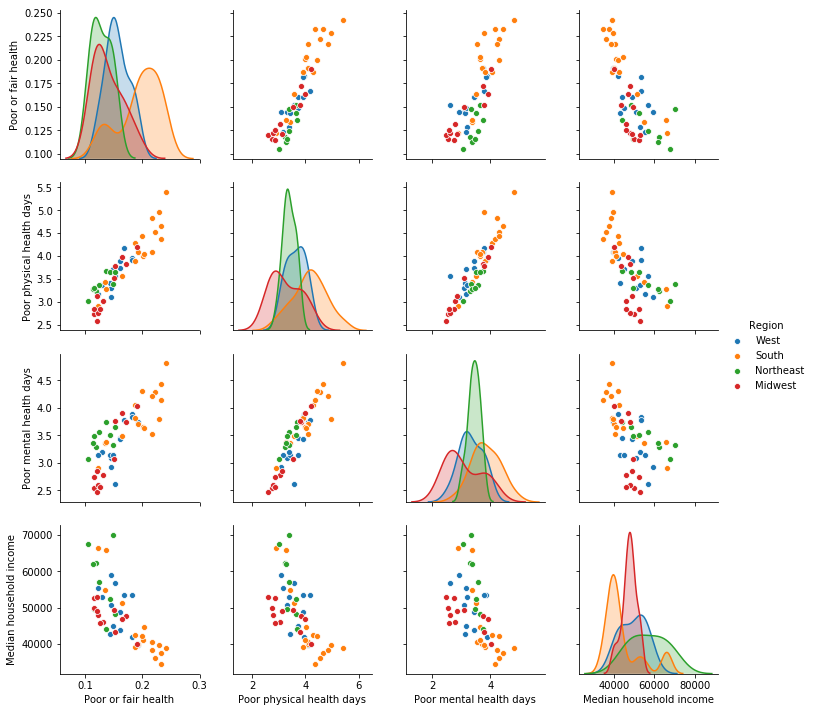

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

states=df.groupby(["State","Region"]).mean().reset_index()  #aggregate data to state-level means using DataFrame methods
states=states[["Region","Poor or fair health","Poor physical health days","Poor mental health days","Median household income"]]

%matplotlib inline
sns.pairplot(states,hue="Region")
plt.show()

## Other Areas

### BeautifulSoup (for parsing HTML or XML data)

Python's built-in `urllib.request` package makes it relatively easy to download the underlying html from a web page. Note that the `from package import function` notation used here allows you to selectively import only parts of a package as needed.

In [27]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
page = urlopen("https://unc-libraries-data.github.io/Python/Python1/Python-1.html")  #The Python 1 materials!
html = page.read()
print(html[:300]) #print only the first 300 characters

b'<!DOCTYPE html>\n<html>\n<head><meta charset="utf-8" />\n\n<title>Python-1</title>\n\n<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>\n<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>\n\n\n\n<style type="text/css">\n    /*!'


In [28]:
soup=BeautifulSoup(html,"html.parser")
[x.text for x in soup.find_all("h1")] # find all h1 (top-level headers)

['Python I',
 '0. Setup',
 '1. Entering code',
 '2. Variables',
 '3. Conditionals',
 '4. Loops']

**Note:** Always check a site's Terms of Service before scraping it.  Some sites explicitly prohibit web scraping of their data.

### NLTK (text analysis)

<a href="http://www.nltk.org/">The Natural Language Toolkit (`nltk`)</a> provides a wide array of tools for processing and analyzing text.  This includes operations like splitting text into sentences or words ("tokenization"), tagging them with their part of speech, classification, and more.

## Jupyter Notebooks

Sooner or later, you'll want to share your code or projects with other people (even if only future-you!).  <a href="http://jupyter.org/">Jupyter notebooks</a>, included with Anaconda, provide integration between code, its output, images, and formatted text beyond what's possible with in-code comments.  The materials for these workshops were created in Jupyter notebooks, then exported to html.

## GitHub

The materials for this workshop series are maintained in Git and hosted on GitHub.  The materials from our Git / GitHub workshop are available [here](https://github.com/UNC-Libraries-data/Intro-to-Git).

## Feedback

Please fill out our [**Feedback Survey**](http://unc.libsurveys.com/davishubfeedback).

We'd love your input on future workshop topics and ways we could improve this workshop next time we teach it!

## Resources / Learn more:

* <a href="https://jakevdp.github.io/PythonDataScienceHandbook/">Python Data Science Handbook</a>  This free ebook emphasizes Numpy, Scipy, Matplotlib, Pandas and other data analysis packages in Python, assuming some familiarity with the basic principles of the language.

* <a href="https://automatetheboringstuff.com/">Automate the Boring Stuff with Python</a>

* <a href="https://ehmatthes.github.io/pcc/cheatsheets/README.html">Python Cheatsheets</a>

* <a href="https://stackoverflow.com/questions/tagged/python-3.x?sort=frequent&pageSize=15">Stack Overflow</a>

* <a href="https://www.google.com/">Google!</a>

* <a href="http://guides.lib.unc.edu/mattjansen">Make an appointment with Matt</a>

* <a href="http://www.karsdorp.io/python-course/">Python Programming for the Humanities</a>

